<a href="https://colab.research.google.com/github/LuisAL79/Artigo_EPEPE_2024/blob/main/Censo_Artigo_EPEPE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Solução das EDOs**

In [ ]:
from sympy import *

k, m, t, N0 = symbols('k m t N_0')
N = symbols('N', cls=Function)

## **EDO de crescimento Exponencial**

In [ ]:
edo = Eq(N(t).diff(t),k*N(t))
display(edo)
print()

sol = dsolve(edo,N(t),ics={N(0):N0})
sol

Eq(Derivative(N(t), t), k*N(t))

Eq(N(t), N_0*exp(k*t))

## **EDO de crescimento Exponencial com emigração**

In [ ]:
edo = Eq(N(t).diff(t),k*N(t)-m)
display(edo)
print()

sol = dsolve(edo,N(t),ics={N(0):N0})
sol

Eq(Derivative(N(t), t), k*N(t) - m)

Eq(N(t), m/k + (N_0*k - m)*exp(k*t)/k)

# **Análide dos dados dos Censos entre 1991 até 2020**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

## **Tabela com cidades de máxima população por região**

In [ ]:
# Dados fornecidos
data = {
    'Regiao': ['Araguaia', 'Rio Capim', 'Marajó', 'Xingu', 'Lago de Tucuruí', 'Rio Caeté', 'Tocantins', 'Guamá', 'Tapajós', 'Carajás', 'Baixo Amazonas', 'Guajará'],
    'Municípios_x': ['Redenção', 'Paragominas', 'Breves', 'Altamira', 'Tucuruí', 'Bragança', 'Abaetetuba', 'Castanhal', 'Itaituba', 'Marabá', 'Santarém', 'Belém'],
    'T_1991': [55968.0, 67075.0, 72140.0, 72408.0, 81623.0, 97149.0, 99989.0, 102071.0, 116402.0, 123668.0, 265062.0, 1244689.0],
    'Município_x': ['Redenção', 'Paragominas', 'Breves', 'Altamira', 'Tucuruí', 'Bragança', 'Abaetetuba', 'Castanhal', 'Itaituba', 'Marabá', 'Santarém', 'Belém'],
    'T_2000': [63251.0, 76450.0, 80158.0, 77439.0, 73798.0, 93779.0, 119152.0, 134496.0, 94750.0, 168020.0, 262538.0, 1280614.0],
    'Município_y': ['São Félix do Xingu', 'Paragominas', 'Breves', 'Altamira', 'Tucuruí', 'Bragança', 'Abaetetuba', 'Castanhal', 'Itaituba', 'Marabá', 'Santarém', 'Belém'],
    'T_2010': [91293.0, 97788.0, 92865.0, 105030.0, 97109.0, 113165.0, 141054.0, 173096.0, 97343.0, 233462.0, 294774.0, 1392031.0],
    'Município_x_x': ['São Félix do Xingu', 'Paragominas', 'Breves', 'Altamira', 'Tucuruí', 'Bragança', 'Abaetetuba', 'Castanhal', 'Itaituba', 'Marabá', 'Santarém', 'Belém'],
    'T_2013': [106940.0, 103775.0, 96444.0, 105106.0, 103619.0, 118678.0, 147267.0, 183917.0, 98363.0, 251885.0, 288462.0, 1425922.0],
    'Município_y_x': ['São Félix do Xingu', 'Paragominas', 'Breves', 'Altamira', 'Tucuruí', 'Bragança', 'Abaetetuba', 'Castanhal', 'Itaituba', 'Marabá', 'Santarém', 'Belém'],
    'T_2014': [111633.0, 105417.0, 97351.0, 106768.0, 105431.0, 120124.0, 148873.0, 186895.0, 98405.0, 257062.0, 290521.0, 1432844.0],
    'Município': ['São Félix do Xingu', 'Paragominas', 'Breves', 'Altamira', 'Tucuruí', 'Bragança', 'Abaetetuba', 'Castanhal', 'Itaituba', 'Marabá', 'Santarém', 'Belém'],
    'T_2015': [116186.0, 107010.0, 98231.0, 108382.0, 107189.0, 121528.0, 150431.0, 189784.0, 98446.0, 262085.0, 292520.0, 1439561.0],
    'Município_x_y': ['São Félix do Xingu', 'Paragominas', 'Breves', 'Altamira', 'Tucuruí', 'Bragança', 'Abaetetuba', 'Castanhal', 'Itaituba', 'Marabá', 'Santarém', 'Belém'],
    'T_2016': [120580.0, 108547.0, 99080.0, 109938.0, 108885.0, 122881.0, 151934.0, 192571.0, 98485.0, 266932.0, 294447.0, 1446042.0],
    'Município_y_y': ['São Félix do Xingu', 'Paragominas', 'Breves', 'Altamira', 'Tucuruí', 'Bragança', 'Abaetetuba', 'Castanhal', 'Itaituba', 'Marabá', 'Santarém', 'Belém'],
    'T_2017': [124806.0, 110026.0, 99896.0, 111435.0, 110516.0, 124184.0, 153380.0, 195253.0, 98523.0, 271594.0, 296302.0, 1452275.0],
    'Municípios_y': ['Redenção', 'Paragominas', 'Breves', 'Altamira', 'Tucuruí', 'Bragança', 'Abaetetuba', 'Castanhal', 'Itaituba', 'Parauapebas', 'Santarém', 'Belém'],
    'T_2022': [85597, 105550, 106968, 126279, 91306, 123082, 158188, 192256, 123314, 267836, 331942, 1303403]
}

# Criar DataFrame
df = pd.DataFrame(data)

# Reordenar colunas de acordo com a especificação
df_final = df[['Regiao', 'Municípios_x', 'T_1991', 'Município_x', 'T_2000', 'Município_y', 'T_2010', 'Município_x_x', 'T_2013', 'Município_y_x', 'T_2014', 'Município', 'T_2015', 'Município_x_y', 'T_2016', 'Município_y_y', 'T_2017', 'Municípios_y', 'T_2022']]
df_final

,Regiao,Municípios_x,T_1991,Município_x,T_2000,Município_y,T_2010,Município_x_x,T_2013,Município_y_x,T_2014,Município,T_2015,Município_x_y,T_2016,Município_y_y,T_2017,Municípios_y,T_2022
0,Araguaia,Redenção,55968.0,Redenção,63251.0,São Félix do Xingu,91293.0,São Félix do Xingu,106940.0,São Félix do Xingu,111633.0,São Félix do Xingu,116186.0,São Félix do Xingu,120580.0,São Félix do Xingu,124806.0,Redenção,85597
1,Rio Capim,Paragominas,67075.0,Paragominas,76450.0,Paragominas,97788.0,Paragominas,103775.0,Paragominas,105417.0,Paragominas,107010.0,Paragominas,108547.0,Paragominas,110026.0,Paragominas,105550
2,Marajó,Breves,72140.0,Breves,80158.0,Breves,92865.0,Breves,96444.0,Breves,97351.0,Breves,98231.0,Breves,99080.0,Breves,99896.0,Breves,106968
3,Xingu,Altamira,72408.0,Altamira,77439.0,Altamira,105030.0,Altamira,105106.0,Altamira,106768.0,Altamira,108382.0,Altamira,109938.0,Altamira,111435.0,Altamira,126279
4,Lago de Tucuruí,Tucuruí,81623.0,Tucuruí,73798.0,Tucuruí,97109.0,Tucuruí,103619.0,Tucuruí,105431.0,Tucuruí,107189.0,Tucuruí,108885.0,Tucuruí,110516.0,Tucuruí,91306
5,Rio Caeté,Bragança,97149.0,Bragança,93779.0,Bragança,113165.0,Bragança,118678.0,Bragança,120124.0,Bragança,121528.0,Bragança,122881.0,Bragança,124184.0,Bragança,123082
6,Tocantins,Abaetetuba,99989.0,Abaetetuba,119152.0,Abaetetuba,141054.0,Abaetetuba,147267.0,Abaetetuba,148873.0,Abaetetuba,150431.0,Abaetetuba,151934.0,Abaetetuba,153380.0,Abaetetuba,158188
7,Guamá,Castanhal,102071.0,Castanhal,134496.0,Castanhal,173096.0,Castanhal,183917.0,Castanhal,186895.0,Castanhal,189784.0,Castanhal,192571.0,Castanhal,195253.0,Castanhal,192256
8,Tapajós,Itaituba,116402.0,Itaituba,94750.0,Itaituba,97343.0,Itaituba,98363.0,Itaituba,98405.0,Itaituba,98446.0,Itaituba,98485.0,Itaituba,98523.0,Itaituba,123314
9,Carajás,Marabá,123668.0,Marabá,168020.0,Marabá,233462.0,Marabá,251885.0,Marabá,257062.0,Marabá,262085.0,Marabá,266932.0,Marabá,271594.0,Parauapebas,267836


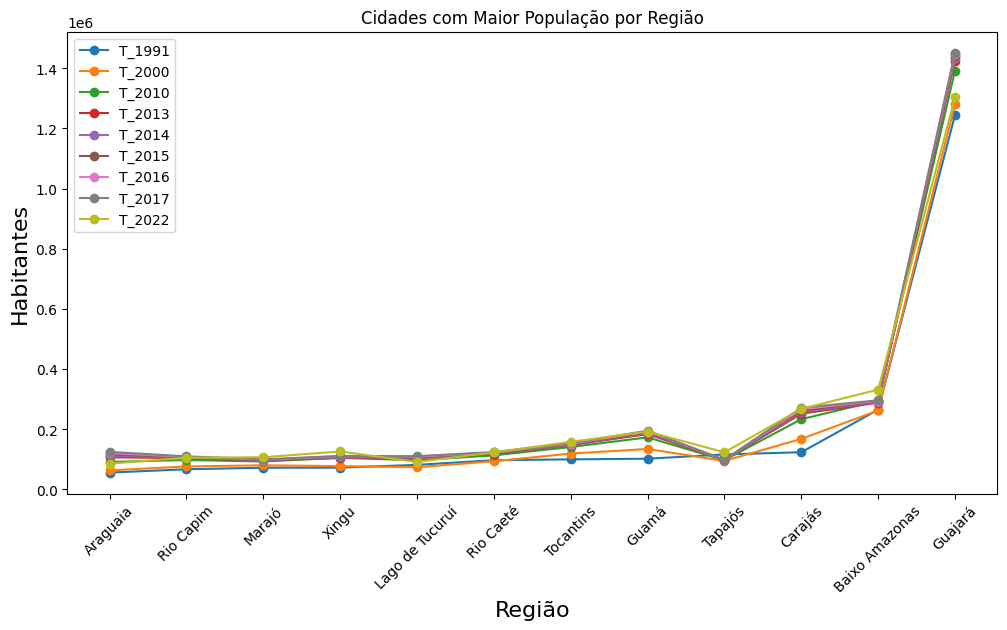

In [ ]:
df_final.plot(x=0,y=[2,4,6,8,10,12,14,16,18],figsize=(12, 6), marker='o', linestyle='-',
                      xlabel='Região')

plt.xticks(range(len(df_final)), df_final['Regiao'], rotation=45)
plt.xlabel('Região', fontsize=16)
plt.ylabel('Habitantes', fontsize=16)
plt.title('Cidades com Maior População por Região')

plt.show()

### **Cálculo da taxa de crescimento por região para os Máximos**

$$TC = \frac{P_{i+1}-P_i}{P_{i+1}}\left(\frac{1}{\Delta t}\right)$$

$P_i$ é a população no ano $i$ e $P_{i+1}$ é a população no próximo ano, $\Delta t$ é o intervalo de tempo entre os censos.

In [ ]:
df_T = df_final[['Regiao', 'T_1991', 'T_2000', 'T_2010', 'T_2013',
                'T_2014', 'T_2015', 'T_2016', 'T_2017', 'T_2022']]

def calcula_taxa_crescimento(df,lista_anos):
  # Função para calcular a taxa de crescimento entre anos
  def taxa_crescimento(ano_anterior, ano_seguinte, anos_decorridos):
    taxa = ((ano_seguinte - ano_anterior) / ano_seguinte) #* 100
    return taxa/anos_decorridos

  # Função para extrair os anos e calcular a diferença entre eles
  def extrair_anos(lista):
    regex = re.compile(r'\d+') # Expressão regular para encontrar números
    # Extrair apenas os números de cada elemento da lista
    numeros = [int(regex.search(item).group()) for item in lista if regex.search(item)]
    # Calcular a diferença entre cada par de números adjacentes
    difer = [numeros[i+1] - numeros[i] for i in range(len(numeros) - 1)]
    return difer

  # Calcular a lista de períodos entre os anos
  anos_entre_anos = extrair_anos(lista_anos)

  # Calcular a taxa de crescimento para cada região e ano
  taxas_crescimento = {}
  for regiao in df.index:
    taxas_regiao = []
    for i in range(1,len(df.columns)-1):
      ano_atual = df.loc[regiao][i]
      ano_seguinte = df.loc[regiao][i+1]
      periodo = anos_entre_anos[i-1]  # Período entre os anos
      taxa = taxa_crescimento(ano_atual, ano_seguinte, periodo)
      taxas_regiao.append(taxa)
    taxas_crescimento[regiao] = taxas_regiao

  # Calcular a média das taxas de crescimento para cada região
  media_taxas=[]
  for regiao, taxas in taxas_crescimento.items():
    media_taxas.append(sum(taxas) / len(taxas))

  return media_taxas, taxas_crescimento

# Função para extrair os anos e calcular a diferença entre eles
import re
def number_extract(lista):
  regex = re.compile(r'\d+') # Expressão regular para encontrar números
  # Extrair apenas os números de cada elemento da lista
  numeros = [int(regex.search(item).group()) for item in lista if regex.search(item)]
  difer = [numeros[i+1] - numeros[i] for i in range(len(numeros) - 1)]
  return numeros

df_T = df_T.copy()
taxas = calcula_taxa_crescimento(df_T,df_T.columns)
df_T['Taxa_med']=taxas[0]
df_T

,Regiao,T_1991,T_2000,T_2010,T_2013,T_2014,T_2015,T_2016,T_2017,T_2022,Taxa_med
0,Araguaia,55968.0,63251.0,91293.0,106940.0,111633.0,116186.0,120580.0,124806.0,85597,0.019025
1,Rio Capim,67075.0,76450.0,97788.0,103775.0,105417.0,107010.0,108547.0,110026.0,105550,0.013033
2,Marajó,72140.0,80158.0,92865.0,96444.0,97351.0,98231.0,99080.0,99896.0,106968,0.010675
3,Xingu,72408.0,77439.0,105030.0,105106.0,106768.0,108382.0,109938.0,111435.0,126279,0.014411
4,Lago de Tucuruí,81623.0,73798.0,97109.0,103619.0,105431.0,107189.0,108885.0,110516.0,91306,0.006876
5,Rio Caeté,97149.0,93779.0,113165.0,118678.0,120124.0,121528.0,122881.0,124184.0,123082,0.008991
6,Tocantins,99989.0,119152.0,141054.0,147267.0,148873.0,150431.0,151934.0,153380.0,158188,0.011750
7,Guamá,102071.0,134496.0,173096.0,183917.0,186895.0,189784.0,192571.0,195253.0,192256,0.015618
8,Tapajós,116402.0,94750.0,97343.0,98363.0,98405.0,98446.0,98485.0,98523.0,123314,0.002820
9,Carajás,123668.0,168020.0,233462.0,251885.0,257062.0,262085.0,266932.0,271594.0,267836,0.019195


### **Fitting para crescimento exponencial**

In [ ]:
from scipy.optimize import curve_fit
import numpy as np

def fit_edE(T,P0,k):
  popu = P0*np.exp(k*T)
  return popu

### **Ajuste do crescimento usando o modelo Exponencial**

In [ ]:
def ajuste_dados(P, t):

    # Garantir que os dados sejam do tipo float
    P = np.array(P, dtype=float)
    t = np.array(t, dtype=float)

    # Transformações necessárias para ajuste linear
    yex = np.log(P)
    x1ex = t

    # Número de equações e incógnitas
    N = len(yex)  # número de equações
    n = 2         # número de incógnitas: a_0, a_1

    # Construção da matriz A
    A = np.zeros((N, n))
    A.T[0] = np.ones_like(yex)
    A.T[1] = x1ex

    # valores de y
    b = yex

    # Produto matricial para resolver o sistema de equações normais
    B = np.dot(A.T, A)
    C = np.dot(A.T, b)
    a = np.dot(np.linalg.inv(B), C)

    # Cálculo da curva de ajuste
    ya = a[0] + a[1]*x1ex

    # Cálculo do coeficiente de correlação (R^2)
    ymed = yex.mean()
    Rq = 1 - np.sum((ya - yex)**2) / np.sum((ymed - yex)**2)

    # Parâmetros do modelo
    P0 = np.exp(a[0])
    k = a[1]

    # Cálculo da curva ajustada
    Pa = P0 * np.exp(k*t)

    return Pa, Rq

,Regiao,Ano,População,Taxa_cresc,Popu_estim
0,Araguaia,1991,55968.0,0.000000,55968.0
1,,2000,63251.0,0.012794,62798.1
2,,2010,91293.0,0.030716,85993.8
3,,2013,106940.0,0.048772,105677.3
4,,2014,111633.0,0.042040,111531.5
5,,2015,116186.0,0.039187,116094.4
6,,2016,120580.0,0.036441,120498.0
7,,2017,124806.0,0.033861,124732.8
8,,2022,85597.0,-0.091613,78940.6


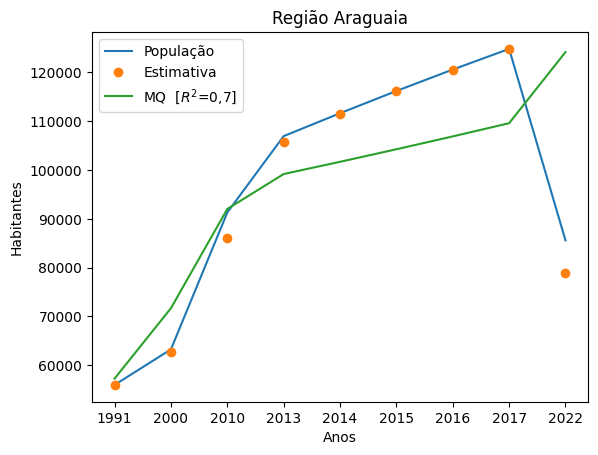

In [ ]:
# Função para extrair os anos e calcular a diferença entre eles
def extrair_anos(lista):
  regex = re.compile(r'\d+') # Expressão regular para encontrar números
  # Extrair apenas os números de cada elemento da lista
  numeros = [int(regex.search(item).group()) for item in lista if regex.search(item)]
  # Calcular a diferença entre cada par de números adjacentes
  difer = [numeros[i+1] - numeros[i] for i in range(len(numeros) - 1)]
  return difer

def reshape_df(df, cidade_col, cidade_interesse, ano_cols):
    # Criando listas para armazenar os dados do novo DataFrame
    cidades = []   ;   populacoes = []   ;   anos = []

    # Iterando sobre as linhas do DataFrame original
    for index, row in df.iterrows():
        cidade = row[cidade_col]
        if cidade == cidade_interesse:
            primeira_linha = True
            for ano_col in ano_cols:
                ano = ano_col.split('_')[1]  # Extraímos o ano da coluna
                pop = row[ano_col]
                # A cidade aparece apenas na primeira linha
                if primeira_linha:
                    cidades.append(cidade)
                    primeira_linha = False
                else:
                    cidades.append('')
                populacoes.append(pop)
                anos.append(f'{ano}')

    # Criando um novo DataFrame com os dados coletados
    novo_df = pd.DataFrame({cidade_col: cidades, 'Ano': anos, 'População': populacoes})
    return novo_df

regi = df_T.Regiao.tolist()

colunas = ['T_'+str(numero) for numero in number_extract(df_T.columns)]

nome_R = 0
novo_df = reshape_df(df_T, 'Regiao', regi[nome_R], colunas)
novo_df['Taxa_cresc']=[0]+taxas[1][nome_R]

def predict_popu(df,df_base):
  t_a = extrair_anos(df_base.columns)
  nl = len(df.Ano.tolist())
  popu = []
  for i in range(nl-1):
    popu.append(round(fit_edE(t_a[i], df.iloc[i, 2], df.iloc[i+1, 3]),1))
  return popu

# Chame a função com o DataFrame 'novo_df'
populacoes = predict_popu(novo_df,df_T)
novo_df['Popu_estim']=[novo_df.iloc[0,2]]+populacoes
display(novo_df)

Pa, Rk = ajuste_dados(np.array(novo_df['População']),np.array(novo_df['Ano']))

ax = novo_df.plot(x='Ano', y='População', marker='', label='População',
                  title='Região '+regi[nome_R])
novo_df.plot(x='Ano', y='Popu_estim', ls='',marker='o', label='Estimativa',
             ax=ax, xlabel='Anos', ylabel=r'Habitantes')
plt.plot(novo_df['Ano'], Pa, ls='-', label='MQ'+'  [$R^2$='+str(round(Rk,1)).replace('.', ',')+']')

plt.legend()
plt.show()

### **Seleção de muncípios com crescimento exponencial**

In [ ]:
def retorna(df_T,nome_R,novo_df):
  novo_df = reshape_df(df_T, 'Regiao', regi[nome_R], colunas)
  novo_df['Taxa_cresc']=[0]+taxas[1][nome_R]

  def predict_popu(df,df_base):
    t_a = extrair_anos(df_base.columns)
    nl = len(df.Ano.tolist())
    popu = []
    for i in range(nl-1):
      popu.append(round(fit_edE(t_a[i], df.iloc[i, 2], df.iloc[i+1, 3]),1))
    return popu

  # Chame a função com o DataFrame 'novo_df'
  populacoes = predict_popu(novo_df,df_T)
  novo_df['Popu_estim']=[novo_df.iloc[0,2]]+populacoes
  Pa, Rk = ajuste_dados(np.array(novo_df['População']),np.array(novo_df['Ano']))
  novo_df['MQ']=Pa
  novo_df['R2']=Rk

  return novo_df

nome_R = [6,7,9,10]
dat_Toc = retorna(df_T,6,novo_df)
dat_Gua = retorna(df_T,7,novo_df)
dat_Car = retorna(df_T,9,novo_df)
dat_BAm = retorna(df_T,10,novo_df)

#### **Gráficos de 4 municípios**

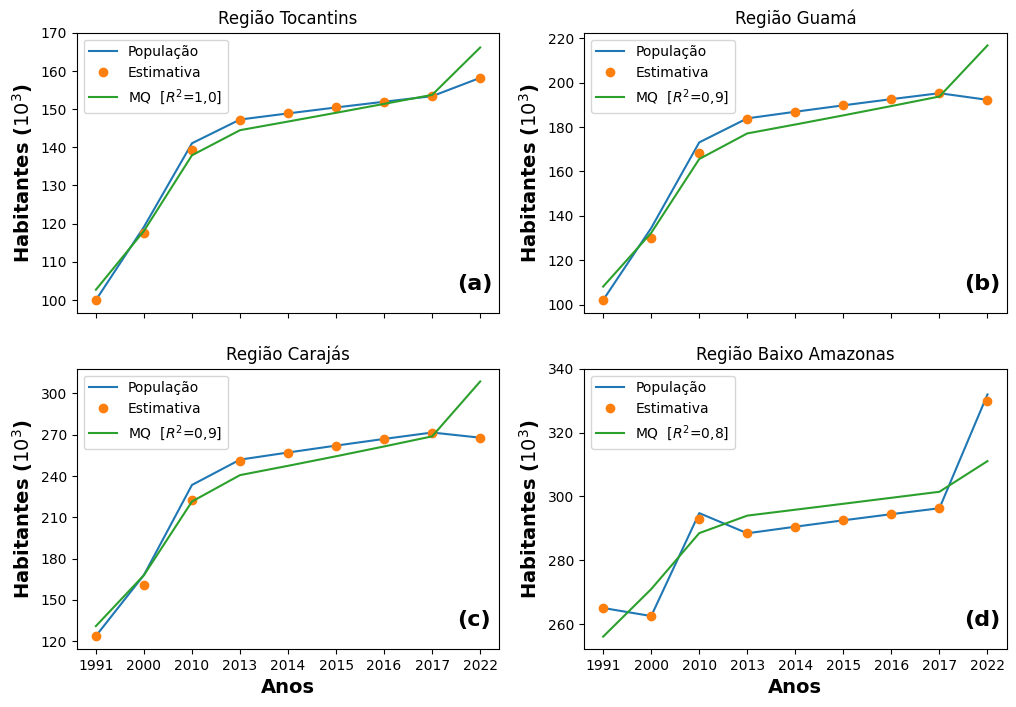

In [ ]:
# Gráfico
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
ax1 = plt.subplot(221)
plt.plot(dat_Toc['Ano'],dat_Toc['População'],label='População')
plt.plot(dat_Toc['Ano'],dat_Toc['Popu_estim'],label='Estimativa',marker='o',ls='')
Rk = round(dat_Toc.iloc[0,6],1)
plt.plot(dat_Toc['Ano'],dat_Toc['MQ'], ls='-', label='MQ'+'  [$R^2$='+str(Rk).replace('.', ',')+']')
plt.title(f'Região {regi[6]}')
plt.xlabel('')
plt.ylabel(r'Habitantes ($10^3$)', fontsize=14, fontweight='bold')
ax1.yaxis.set_ticks(np.arange(100000, 175000, 10000))
ax1.set_yticklabels([l for l in range(100,175,10)])
ax1.set_xticklabels([])
ax1.text(0.9, 0.08, '(a)', transform=ax1.transAxes, fontsize=16, fontweight='bold')
ax1.legend()

ax2 = plt.subplot(222)
plt.plot(dat_Gua['Ano'],dat_Gua['População'],label='População')
plt.plot(dat_Gua['Ano'],dat_Gua['Popu_estim'],label='Estimativa',marker='o',ls='')
Rk = round(dat_Gua.iloc[0,6],1)
plt.plot(dat_Gua['Ano'],dat_Gua['MQ'], ls='-', label='MQ'+'  [$R^2$='+str(Rk).replace('.', ',')+']')
plt.title(f'Região {regi[7]}')
plt.xlabel('')
plt.ylabel(r'Habitantes ($10^3$)', fontsize=14, fontweight='bold')
ax2.yaxis.set_ticks(np.arange(100000, 225000, 20000))
ax2.set_yticklabels([l for l in range(100,225,20)])
ax2.set_xticklabels([])
ax2.text(0.9, 0.08, '(b)', transform=ax2.transAxes, fontsize=16, fontweight='bold')
ax2.legend()

ax3 = plt.subplot(223)
plt.plot(dat_Car['Ano'],dat_Car['População'],label='População')
plt.plot(dat_Car['Ano'],dat_Car['Popu_estim'],label='Estimativa',marker='o',ls='')
Rk = round(dat_Car.iloc[0,6],1)
plt.plot(dat_Car['Ano'],dat_Car['MQ'], ls='-', label='MQ'+'  [$R^2$='+str(Rk).replace('.', ',')+']')
plt.title(f'Região {regi[9]}')
plt.xlabel('Anos', fontsize=14, fontweight='bold')
plt.ylabel(r'Habitantes ($10^3$)', fontsize=14, fontweight='bold')
ax3.yaxis.set_ticks(np.arange(120000, 305000, 30000))
ax3.set_yticklabels([l for l in range(120,305,30)])
ax3.text(0.9, 0.08, '(c)', transform=ax3.transAxes, fontsize=16, fontweight='bold')
ax3.legend()

ax4 = plt.subplot(224)
plt.plot(dat_BAm['Ano'],dat_BAm['População'],label='População')
plt.plot(dat_BAm['Ano'],dat_BAm['Popu_estim'],label='Estimativa',marker='o',ls='')
Rk = round(dat_BAm.iloc[0,6],1)
plt.plot(dat_BAm['Ano'],dat_BAm['MQ'], ls='-', label='MQ'+'  [$R^2$='+str(Rk).replace('.', ',')+']')
ax4.set_title(f'Região {regi[10]}')
plt.xlabel('Anos', fontsize=14, fontweight='bold')
plt.ylabel(r'Habitantes ($10^3$)', fontsize=14, fontweight='bold')
ax4.yaxis.set_ticks(np.arange(260000, 350000, 20000))
ax4.set_yticklabels([l for l in range(260,345,20)])
ax4.text(0.9, 0.08, '(d)', transform=ax4.transAxes, fontsize=16, fontweight='bold')
ax4.legend()

plt.show()

## **Tabela com cidades de mínima população por região**

In [ ]:
import pandas as pd

# Dados fornecidos
data = {
    'Regiao': ['Rio Caeté', 'Marajó', 'Guamá', 'Araguaia', 'Tapajós', 'Carajás', 'Baixo Amazonas', 'Rio Capim', 'Xingu', 'Tocantins', 'Lago de Tucuruí', 'Guajará'],
    'Municípios_x': ['Santarém Novo', 'Santa Cruz do Arari', 'Inhangapi', 'Santa Maria das Barreiras', 'Aveiro', 'Brejo Grande do Araguaia', 'Faro', 'Bujaru', 'Porto de Moz', 'Limoeiro do Ajuru', 'Itupiranga', 'Benevides'],
    'T_1991': [4486.0, 4774.0, 6668.0, 7228.0, 10876.0, 11939.0, 13574.0, 14117.0, 15407.0, 16475.0, 37011.0, 68465.0],
    'Município_x': ['Santarém Novo', 'Santa Cruz do Arari', 'São João da Ponta', 'Bannach', 'Trairão', 'Brejo Grande do Araguaia', 'Curuá', 'Abel Figueiredo', 'Anapu', 'Limoeiro do Ajuru', 'Nova Ipixuna', 'Santa Bárbara do Pará'],
    'T_2000': [5434.0, 5255.0, 4035.0, 3780.0, 14042.0, 7464.0, 9224.0, 5957.0, 9407.0, 19564.0, 11866.0, 11378.0],
    'Município_y': ['Santarém Novo', 'Santa Cruz do Arari', 'São João da Ponta', 'Bannach', 'Jacareacanga', 'Brejo Grande do Araguaia', 'Faro', 'Abel Figueiredo', 'Senador José Porfírio', 'Limoeiro do Ajuru', 'Nova Ipixuna', 'Santa Bárbara do Pará'],
    'T_2010': [6145.0, 8163.0, 5265.0, 3434.0, 14040.0, 7324.0, 8181.0, 6792.0, 12998.0, 25028.0, 14645.0, 17154.0],
    'Município_x_x': ['Santarém Novo', 'Santa Cruz do Arari', 'São João da Ponta', 'Bannach', 'Aveiro', 'Brejo Grande do Araguaia', 'Faro', 'Abel Figueiredo', 'Senador José Porfírio', 'Limoeiro do Ajuru', 'Nova Ipixuna', 'Santa Bárbara do Pará'],
    'T_2013': [6341.0, 8957.0, 5608.0, 3340.0, 15959.0, 7285.0, 7680.0, 7013.0, 12331.0, 26542.0, 15422.0, 18736.0],
    'Município_y_x': ['Santarém Novo', 'Santa Cruz do Arari', 'São João da Ponta', 'Bannach', 'Aveiro', 'Brejo Grande do Araguaia', 'Faro', 'Abel Figueiredo', 'Senador José Porfírio', 'Limoeiro do Ajuru', 'Nova Ipixuna', 'Santa Bárbara do Pará'],
    'T_2014': [6390.0, 9191.0, 5703.0, 3303.0, 15956.0, 7258.0, 7504.0, 7070.0, 12075.0, 26961.0, 15632.0, 19197.0],
    'Município': ['Santarém Novo', 'Santa Cruz do Arari', 'São João da Ponta', 'Bannach', 'Aveiro', 'Brejo Grande do Araguaia', 'Faro', 'Abel Figueiredo', 'Senador José Porfírio', 'Limoeiro do Ajuru', 'Nova Ipixuna', 'Santa Bárbara do Pará'],
    'T_2015': [6437.0, 9417.0, 5795.0, 3267.0, 15953.0, 7232.0, 7333.0, 7126.0, 11827.0, 27368.0, 15836.0, 19645.0],
    'Município_x_y': ['Santarém Novo', 'Santa Cruz do Arari', 'São João da Ponta', 'Bannach', 'Aveiro', 'Brejo Grande do Araguaia', 'Faro', 'Abel Figueiredo', 'Senador José Porfírio', 'Limoeiro do Ajuru', 'Nova Ipixuna', 'Santa Bárbara do Pará'],
    'T_2016': [6482.0, 9635.0, 5884.0, 3233.0, 15950.0, 7206.0, 7168.0, 7179.0, 11587.0, 27760.0, 16032.0, 20077.0],
    'Município_y_y': ['Santarém Novo', 'Santa Cruz do Arari', 'São João da Ponta', 'Bannach', 'Jacareacanga', 'Brejo Grande do Araguaia', 'Faro', 'Abel Figueiredo', 'Senador José Porfírio', 'Limoeiro do Ajuru', 'Nova Ipixuna', 'Santa Bárbara do Pará'],
    'T_2017': [6526.0, 9845.0, 5970.0, 3200.0, 8059.0, 7182.0, 7009.0, 7231.0, 11357.0, 28138.0, 16221.0, 20492.0],
    'Municípios_y': ['Santarém Novo', 'Santa Cruz do Arari', 'São João da Ponta', 'Bannach', 'Trairão', 'Brejo Grande do Araguaia', 'Faro', 'Abel Figueiredo', 'Senador José Porfírio', 'Limoeiro do Ajuru', 'Nova Ipixuna', 'Santa Bárbara do Pará'],
    'T_2022': [6116, 7445, 4430, 4031, 15242, 6783, 10, 7030, 15607, 27198, 13955, 21087]
}

# Criar DataFrame
df_final_m = pd.DataFrame(data)
df_final_m

,Regiao,Municípios_x,T_1991,Município_x,T_2000,Município_y,T_2010,Município_x_x,T_2013,Município_y_x,T_2014,Município,T_2015,Município_x_y,T_2016,Município_y_y,T_2017,Municípios_y,T_2022
0,Rio Caeté,Santarém Novo,4486.0,Santarém Novo,5434.0,Santarém Novo,6145.0,Santarém Novo,6341.0,Santarém Novo,6390.0,Santarém Novo,6437.0,Santarém Novo,6482.0,Santarém Novo,6526.0,Santarém Novo,6116
1,Marajó,Santa Cruz do Arari,4774.0,Santa Cruz do Arari,5255.0,Santa Cruz do Arari,8163.0,Santa Cruz do Arari,8957.0,Santa Cruz do Arari,9191.0,Santa Cruz do Arari,9417.0,Santa Cruz do Arari,9635.0,Santa Cruz do Arari,9845.0,Santa Cruz do Arari,7445
2,Guamá,Inhangapi,6668.0,São João da Ponta,4035.0,São João da Ponta,5265.0,São João da Ponta,5608.0,São João da Ponta,5703.0,São João da Ponta,5795.0,São João da Ponta,5884.0,São João da Ponta,5970.0,São João da Ponta,4430
3,Araguaia,Santa Maria das Barreiras,7228.0,Bannach,3780.0,Bannach,3434.0,Bannach,3340.0,Bannach,3303.0,Bannach,3267.0,Bannach,3233.0,Bannach,3200.0,Bannach,4031
4,Tapajós,Aveiro,10876.0,Trairão,14042.0,Jacareacanga,14040.0,Aveiro,15959.0,Aveiro,15956.0,Aveiro,15953.0,Aveiro,15950.0,Jacareacanga,8059.0,Trairão,15242
5,Carajás,Brejo Grande do Araguaia,11939.0,Brejo Grande do Araguaia,7464.0,Brejo Grande do Araguaia,7324.0,Brejo Grande do Araguaia,7285.0,Brejo Grande do Araguaia,7258.0,Brejo Grande do Araguaia,7232.0,Brejo Grande do Araguaia,7206.0,Brejo Grande do Araguaia,7182.0,Brejo Grande do Araguaia,6783
6,Baixo Amazonas,Faro,13574.0,Curuá,9224.0,Faro,8181.0,Faro,7680.0,Faro,7504.0,Faro,7333.0,Faro,7168.0,Faro,7009.0,Faro,10
7,Rio Capim,Bujaru,14117.0,Abel Figueiredo,5957.0,Abel Figueiredo,6792.0,Abel Figueiredo,7013.0,Abel Figueiredo,7070.0,Abel Figueiredo,7126.0,Abel Figueiredo,7179.0,Abel Figueiredo,7231.0,Abel Figueiredo,7030
8,Xingu,Porto de Moz,15407.0,Anapu,9407.0,Senador José Porfírio,12998.0,Senador José Porfírio,12331.0,Senador José Porfírio,12075.0,Senador José Porfírio,11827.0,Senador José Porfírio,11587.0,Senador José Porfírio,11357.0,Senador José Porfírio,15607
9,Tocantins,Limoeiro do Ajuru,16475.0,Limoeiro do Ajuru,19564.0,Limoeiro do Ajuru,25028.0,Limoeiro do Ajuru,26542.0,Limoeiro do Ajuru,26961.0,Limoeiro do Ajuru,27368.0,Limoeiro do Ajuru,27760.0,Limoeiro do Ajuru,28138.0,Limoeiro do Ajuru,27198


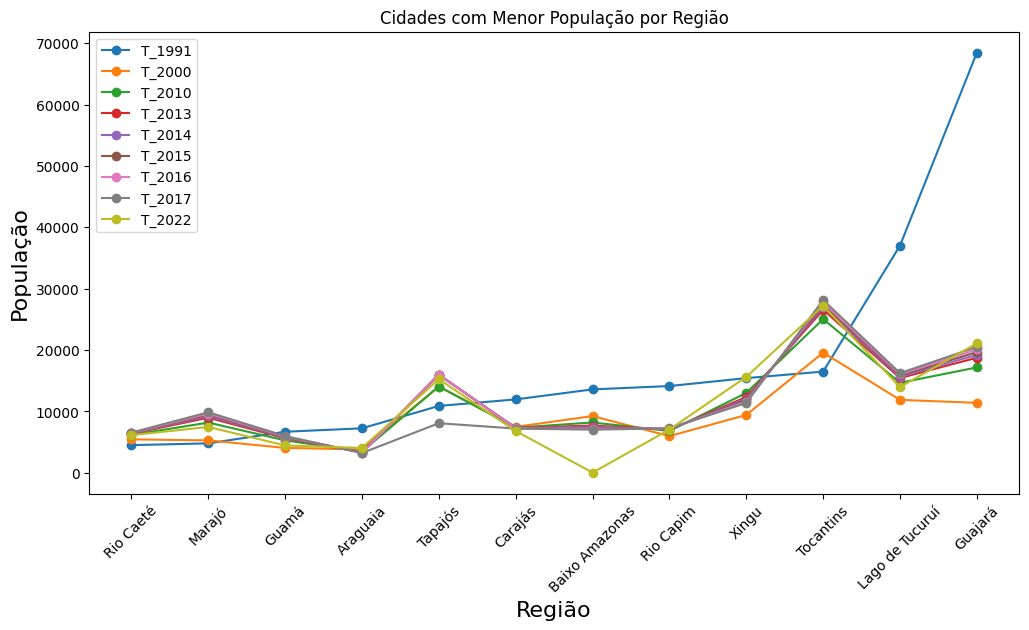

In [ ]:
df_final_m.plot(x=0,y=[2,4,6,8,10,12,14,16,18],figsize=(12, 6), marker='o', linestyle='-',
                      xlabel='Região')

plt.xticks(range(len(df_final_m)), df_final_m['Regiao'], rotation=45)
plt.xlabel('Região', fontsize=16)
plt.ylabel('População', fontsize=16)

plt.title('Cidades com Menor População por Região')
plt.show()

### **Cálculo da taxa de crescimento por região para os Mínimos**

In [ ]:
dfm_T = df_final_m[['Regiao', 'T_1991', 'T_2000', 'T_2010', 'T_2013',
                'T_2014', 'T_2015', 'T_2016', 'T_2017', 'T_2022']]

# Função para extrair os anos e calcular a diferença entre eles
import re
def number_extract(lista):
  regex = re.compile(r'\d+') # Expressão regular para encontrar números
  # Extrair apenas os números de cada elemento da lista
  numeros = [int(regex.search(item).group()) for item in lista if regex.search(item)]
  difer = [numeros[i+1] - numeros[i] for i in range(len(numeros) - 1)]
  return numeros

dfm_T = dfm_T.copy()
taxas = calcula_taxa_crescimento(dfm_T,dfm_T.columns)
dfm_T['Taxa_med']=taxas[0]
dfm_T

,Regiao,T_1991,T_2000,T_2010,T_2013,T_2014,T_2015,T_2016,T_2017,T_2022,Taxa_med
0,Rio Caeté,4486.0,5434.0,6145.0,6341.0,6390.0,6437.0,6482.0,6526.0,6116,0.007063
1,Marajó,4774.0,5255.0,8163.0,8957.0,9191.0,9417.0,9635.0,9845.0,7445,0.013036
2,Guamá,6668.0,4035.0,5265.0,5608.0,5703.0,5795.0,5884.0,5970.0,4430,-0.004527
3,Araguaia,7228.0,3780.0,3434.0,3340.0,3303.0,3267.0,3233.0,3200.0,4031,-0.015329
4,Tapajós,10876.0,14042.0,14040.0,15959.0,15956.0,15953.0,15950.0,8059.0,15242,-0.102543
5,Carajás,11939.0,7464.0,7324.0,7285.0,7258.0,7232.0,7206.0,7182.0,6783,-0.012043
6,Baixo Amazonas,13574.0,9224.0,8181.0,7680.0,7504.0,7333.0,7168.0,7009.0,10,-17.519921
7,Rio Capim,14117.0,5957.0,6792.0,7013.0,7070.0,7126.0,7179.0,7231.0,7030,-0.013078
8,Xingu,15407.0,9407.0,12998.0,12331.0,12075.0,11827.0,11587.0,11357.0,15607,-0.011243
9,Tocantins,16475.0,19564.0,25028.0,26542.0,26961.0,27368.0,27760.0,28138.0,27198,0.013680


### **Ajuste do crescimento usando o modelo Exponencial**

,Regiao,Ano,População,Taxa_cresc,Popu_estim
0,Guajará,1991,68465.0,0.000000,68465.0
1,,2000,11378.0,-0.557479,453.4
2,,2010,17154.0,0.033671,15933.1
3,,2013,18736.0,0.028145,18665.3
4,,2014,19197.0,0.024014,19191.4
5,,2015,19645.0,0.022805,19639.8
6,,2016,20077.0,0.021517,20072.3
7,,2017,20492.0,0.020252,20487.7
8,,2022,21087.0,0.005643,21078.4


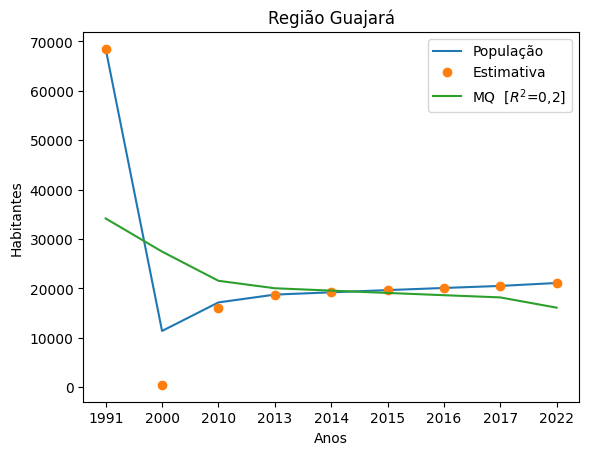

In [ ]:
regi_min = dfm_T.Regiao.tolist() ; regi = regi_min
colunas = ['T_'+str(numero) for numero in number_extract(dfm_T.columns)]

nome_R = 11
novo_min_df = reshape_df(dfm_T, 'Regiao', regi[nome_R], colunas)
novo_min_df['Taxa_cresc']=[0]+taxas[1][nome_R]

def predict_popu(df,df_base):
    t_a = extrair_anos(df_base.columns)
    nl = len(df.Ano.tolist())
    popu = []
    for i in range(nl-1):
        popu.append(round(fit_edE(t_a[i], df.iloc[i, 2], df.iloc[i+1, 3]),1))
    return popu

# Chame a função com o DataFrame 'novo_df'
populacoes = predict_popu(novo_min_df,dfm_T)
novo_min_df['Popu_estim']=[novo_min_df.iloc[0,2]]+populacoes
display(novo_min_df)

Pa, Rk = ajuste_dados(np.array(novo_min_df['População']),np.array(novo_min_df['Ano']))

ax = novo_min_df.plot(x='Ano', y='População', marker='', label='População',
                  title='Região '+regi[nome_R])
novo_min_df.plot(x='Ano', y='Popu_estim', ls='',marker='o', label='Estimativa',
             ax=ax, xlabel='Anos', ylabel=r'Habitantes')

plt.plot(novo_min_df['Ano'], Pa, ls='-', label='MQ'+'  [$R^2$='+str(round(Rk,1)).replace('.', ',')+']')

plt.legend()
plt.show()

### **Seleção de muncípios com crescimento exponencial**

In [ ]:
def retorna(df_T,nome_R,novo_df):
  novo_df = reshape_df(df_T, 'Regiao', regi[nome_R], colunas)
  novo_df['Taxa_cresc']=[0]+taxas[1][nome_R]

  def predict_popu(df,df_base):
    t_a = extrair_anos(df_base.columns)
    nl = len(df.Ano.tolist())
    popu = []
    for i in range(nl-1):
      popu.append(round(fit_edE(t_a[i], df.iloc[i, 2], df.iloc[i+1, 3]),1))
    return popu

  # Chame a função com o DataFrame 'novo_df'
  populacoes = predict_popu(novo_df,df_T)
  novo_df['Popu_estim']=[novo_df.iloc[0,2]]+populacoes
  Pa, Rk = ajuste_dados(np.array(novo_df['População']),np.array(novo_df['Ano']))
  novo_df['MQ']=Pa
  novo_df['R2']=Rk

  return novo_df

nome_R = [0,1,6,9]
dat_Cae = retorna(dfm_T,0,novo_min_df)
dat_Mar = retorna(dfm_T,1,novo_min_df)
dat_BAm = retorna(dfm_T,6,novo_min_df)
dat_Toc = retorna(dfm_T,9,novo_min_df)

#### **Gráficos de 4 municípios**

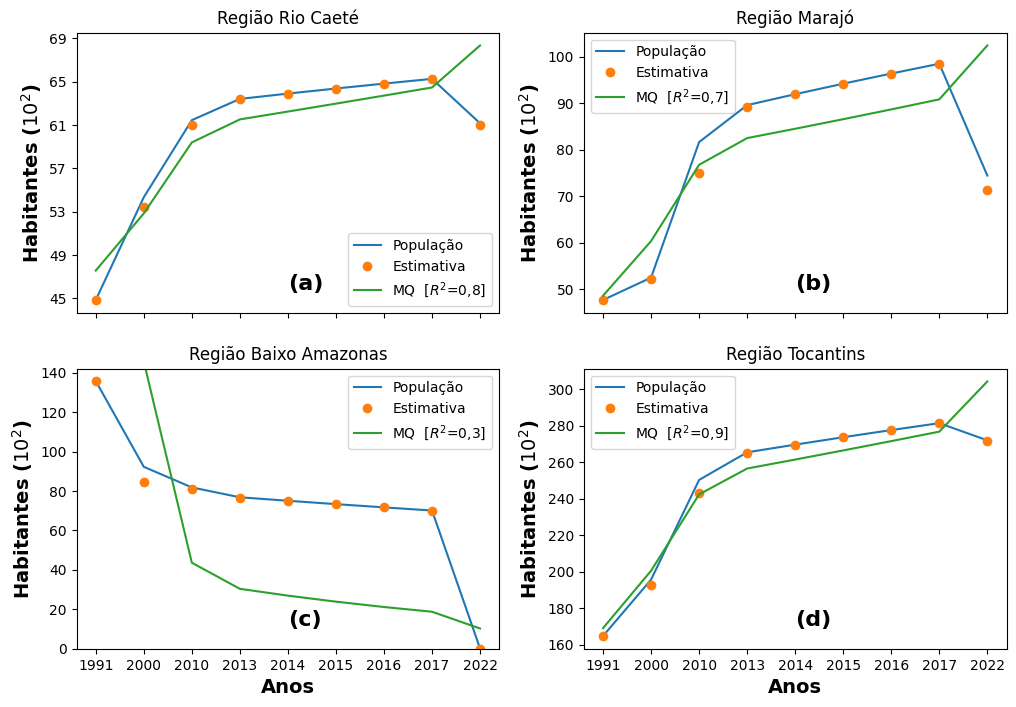

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

ax1 = plt.subplot(221)
plt.plot(dat_Cae['Ano'],dat_Cae['População'],label='População')
plt.plot(dat_Cae['Ano'],dat_Cae['Popu_estim'],label='Estimativa',marker='o',ls='')
Rk = round(dat_Cae.iloc[0,6],1)
plt.plot(dat_Cae['Ano'],dat_Cae['MQ'], ls='-', label='MQ'+'  [$R^2$='+str(Rk).replace('.', ',')+']')
plt.title(f'Região {regi[0]}')
plt.xlabel('')
plt.ylabel(r'Habitantes ($10^2$)', fontsize=14, fontweight='bold')
ax1.yaxis.set_ticks(np.arange(4500, 7200, 400))
ax1.set_yticklabels([l for l in range(45,72,4)])
ax1.set_xticklabels([])
ax1.text(0.5, 0.08, '(a)', transform=ax1.transAxes, fontsize=16, fontweight='bold')
ax1.legend()

ax2 = plt.subplot(222)
plt.plot(dat_Mar['Ano'],dat_Mar['População'],label='População')
plt.plot(dat_Mar['Ano'],dat_Mar['Popu_estim'],label='Estimativa',marker='o',ls='')
Rk = round(dat_Mar.iloc[0,6],1)
plt.plot(dat_Mar['Ano'],dat_Mar['MQ'], ls='-', label='MQ'+'  [$R^2$='+str(Rk).replace('.', ',')+']')
plt.title(f'Região {regi[1]}')
plt.xlabel('')
plt.ylabel(r'Habitantes ($10^2$)', fontsize=14, fontweight='bold')
ax2.yaxis.set_ticks(np.arange(5000, 10500, 1000))
ax2.set_yticklabels([l for l in range(50,105,10)])
ax2.set_xticklabels([])
ax2.text(0.5, 0.08, '(b)', transform=ax2.transAxes, fontsize=16, fontweight='bold')
ax2.legend()

ax3 = plt.subplot(223)
plt.plot(dat_BAm['Ano'],dat_BAm['População'],label='População')
plt.plot(dat_BAm['Ano'],dat_BAm['Popu_estim'],label='Estimativa',marker='o',ls='')
Rk = round(dat_BAm.iloc[0,6],1)
plt.plot(dat_BAm['Ano'],dat_BAm['MQ'], ls='-', label='MQ'+'  [$R^2$='+str(Rk).replace('.', ',')+']')
plt.title(f'Região {regi[6]}')
plt.xlabel('Anos', fontsize=14, fontweight='bold')
plt.ylabel(r'Habitantes ($10^2$)', fontsize=14, fontweight='bold')
ax3.yaxis.set_ticks(np.arange(0, 14200, 2000))
ax3.set_yticklabels([l for l in range(0,142,20)])
ax3.text(0.5, 0.08, '(c)', transform=ax3.transAxes, fontsize=16, fontweight='bold')
plt.ylim(0, 14200)
ax3.legend()

ax4 = plt.subplot(224)
plt.plot(dat_Toc['Ano'],dat_Toc['População'],label='População')
plt.plot(dat_Toc['Ano'],dat_Toc['Popu_estim'],label='Estimativa',marker='o',ls='')
Rk = round(dat_Toc.iloc[0,6],1)
plt.plot(dat_Toc['Ano'],dat_Toc['MQ'], ls='-', label='MQ'+'  [$R^2$='+str(Rk).replace('.', ',')+']')
ax4.set_title(f'Região {regi[9]}')
plt.xlabel('Anos', fontsize=14, fontweight='bold')
plt.ylabel(r'Habitantes ($10^2$)', fontsize=14, fontweight='bold')
ax4.yaxis.set_ticks(np.arange(16000, 30500, 2000))
ax4.set_yticklabels([l for l in range(160,305,20)])
ax4.text(0.5, 0.08, '(d)', transform=ax4.transAxes, fontsize=16, fontweight='bold')
ax4.legend()

plt.show()